In [52]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

In [53]:
path = "GamingStudy_data.csv"
df = pd.read_csv(path, encoding='latin1')
df.head()

,Unnamed: 0,Zeitstempel,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.004366,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.006803,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,I play for fun,having fun,NaN,NaN,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.038599,0,2,2,0,0,3,1,Not difficult at all,2,6,5,2,2,Other,PC,0.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,Female,32,Employed,Bachelor (or equivalent),Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.068037,0,0,0,0,0,0,0,Not difficult at all,2,5,5,3,2,Other,PC,20.0,I play for fun,improving,NaN,NaN,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,Male,28,Employed,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.089478,2,1,2,2,2,3,2,Very difficult,2,2,4,5,1,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [54]:
count_age_less_than_18 = df[df['Age'] < 18].shape[0]

print("Count of samples where age < 18:", count_age_less_than_18)

Count of samples where age < 18: 0


In [55]:
df.columns

Index(['Unnamed: 0', 'Zeitstempel', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5',
       'GAD6', 'GAD7', 'GADE', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game',
       'Platform', 'Hours', 'earnings', 'whyplay', 'League', 'highestleague',
       'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
       'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13',
       'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'Gender', 'Age',
       'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle',
       'accept', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3',
       'Birthplace_ISO3'],
      dtype='object')


Convert columns to numeric

In [56]:
df["Hours"] = pd.to_numeric(df["Hours"], errors="coerce")  # Convert Hours to numeric

# Convert SPIN scores to numeric
spin_cols = [f"SPIN{i}" for i in range(1, 18)]  # Assuming SPIN columns are named SPIN1, SPIN2, ..., SPIN17
df[spin_cols] = df[spin_cols].apply(pd.to_numeric, errors="coerce")

# Convert GAD scores to numeric
gad_cols = [f"GAD{i}" for i in range(1, 8)]  # Assuming GAD columns are named GAD1, GAD2, ..., GAD7
df[gad_cols] = df[gad_cols].apply(pd.to_numeric, errors="coerce")

# Convert SWL scores to numeric
swl_cols = [f"SWL{i}" for i in range(1, 6)]  # Assuming SWL columns are named SWL1, SWL2, ..., SWL5
df[swl_cols] = df[swl_cols].apply(pd.to_numeric, errors="coerce")

# Convert Age to numeric
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["streams"] = pd.to_numeric(df["streams"], errors="coerce")
df["SPIN_T"] = pd.to_numeric(df["SPIN_T"], errors="coerce")
df["SWL_T"] = pd.to_numeric(df["SWL_T"], errors="coerce")
df["GAD_T"] = pd.to_numeric(df["GAD_T"], errors="coerce")
df["SPIN_T"] = pd.to_numeric(df["SPIN_T"], errors = "coerce")

Pruning values - Country and hHours

In [57]:
df = df[df["Hours"] <= 168]
df = df[df["Hours"] >= 5 ]  # Filter out invalid values

birthplace_freq = df['Birthplace'].value_counts()
frequent_birthplaces = birthplace_freq[birthplace_freq > 20].index

# Filter the DataFrame to keep only rows with birthplaces in 'frequent_birthplaces'
df = df[df['Birthplace'].isin(frequent_birthplaces)]

In [58]:
df.shape

(12716, 55)


Reforming Playstyle

In [59]:
import pandas as pd


df["Playstyle"] = df["Playstyle"].str.lower().str.strip()

# Correct typos and inconsistencies
df["Playstyle"] = df["Playstyle"].str.replace("stragers", "strangers")

def categorize_playstyle(playstyle):
    if "singleplayer" in playstyle:
        return "Singleplayer"
    elif "multiplayer" in playstyle and "friends" in playstyle:
        return "Multiplayer with Friends"
    elif "multiplayer" in playstyle and "strangers" in playstyle:
        return "Multiplayer with Strangers"
    elif "multiplayer" in playstyle and "online" in playstyle:
        return "Multiplayer - Online"
    elif "multiplayer" in playstyle and ("real life" in playstyle or "offline" in playstyle):
        return "Multiplayer - Offline"
    elif "multiplayer" in playstyle:
        return "Multiplayer-Unknown"
    else:
        return "Unknown"

# Apply the function to create the "Playstyle_category" column
df["Playstyle_category"] = df["Playstyle"].apply(categorize_playstyle)

In [60]:

import pandas as pd

# Assuming df is your DataFrame with the "whyplay" column
Playstyle_counts = df['Playstyle_category'].value_counts()

# Create a DataFrame from the value counts
Playstyle_counts_df = pd.DataFrame({'Playstyle': Playstyle_counts.index, 'Frequency': Playstyle_counts.values})
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Display the DataFrame
Playstyle_counts_df

,Playstyle,Frequency
0,Multiplayer with Friends,5391
1,Multiplayer with Strangers,3856
2,Multiplayer - Online,2554
3,Singleplayer,705
4,Unknown,156
5,Multiplayer - Offline,44
6,Multiplayer-Unknown,10




Reforming whyplay

In [61]:
import nltk
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Define a function to apply stemming and categorize playstyle
def categorize_playstyle(whyplay):
    # Apply stemming to the input string
    # whyplay_stemmed = ' '.join([stemmer.stem(word) for word in whyplay.split()])
    whyplay_stemmed = whyplay
    # Count the occurrences of relevant words
    count = sum(1 for word in ["winning", "relaxing", "having fun", "improving"] if word in whyplay_stemmed)
    
    # Return "all" if count is greater than or equal to 3
    if count >= 3:
        return "all"
    
    if "improv" in whyplay_stemmed and "win" in whyplay_stemmed and "relax" in whyplay_stemmed and "fun" in whyplay_stemmed:
        return "all"
    elif "all" in whyplay_stemmed or "everyth" in whyplay_stemmed or "mix" in whyplay_stemmed or "any" in whyplay_stemmed or "4" in whyplay_stemmed or "3" in whyplay_stemmed:
        return "all"
    
    elif "improve" in whyplay_stemmed or "learning" in whyplay_stemmed:
        return "improving"
    
    elif "improv" in whyplay_stemmed and "relax" in whyplay_stemmed:
        return "improving and relaxing"
    elif "improv" in whyplay_stemmed and "win" in whyplay_stemmed:
        return "improving and winning"
    elif "improv" in whyplay_stemmed and "fun" in whyplay_stemmed:
        return "improving and having fun"

    elif "relax" in whyplay_stemmed or "fun" in whyplay_stemmed:
        return "relaxing and having fun"
    elif "fun" in whyplay_stemmed:
        return "having fun"
    elif "improv" in whyplay_stemmed or "learning" in whyplay_stemmed:
        return "improving"
    elif "relax" in whyplay_stemmed:
        return "relaxing"
    elif "time" in whyplay_stemmed or "bore" in whyplay_stemmed or "procrastin" in whyplay_stemmed or "something" in whyplay_stemmed:
        return "pass time"
    elif "enemy" in whyplay_stemmed or "kill" in whyplay_stemmed or "loot" in whyplay_stemmed or "lose" in whyplay_stemmed or "losing" in whyplay_stemmed or "perform" in whyplay_stemmed or "well" in whyplay_stemmed or "good" in whyplay_stemmed or "win" in whyplay_stemmed or "conpeting" in whyplay_stemmed or "goal" in whyplay_stemmed or "top" in whyplay_stemmed or "majority" in whyplay_stemmed or "competing" in whyplay_stemmed:
        return "competitive"
    elif "forget" in whyplay_stemmed or "depress" in whyplay_stemmed or "mind" in whyplay_stemmed or "distract" in whyplay_stemmed or "occup" in whyplay_stemmed or "life" in whyplay_stemmed or "work" in whyplay_stemmed or "stress" in whyplay_stemmed or "problems" in whyplay_stemmed:
      return "escaping"
    # elif "living" in whyplay_stemmed or "occupation" in whyplay_stemmed:
    #     return "professional"
    elif "people" in whyplay_stemmed or "social" in whyplay_stemmed or "cooperating" in whyplay_stemmed or "socialising" in whyplay_stemmed or "friends" in whyplay_stemmed or "helping" in whyplay_stemmed:
        return "socialising"
    else:
        return "others"

# Apply the function to create the "whyplay_category" column
df["whyplay_category"] = df["whyplay"].str.lower().str.strip().apply(categorize_playstyle)


In [62]:
import pandas as pd

# Assuming df is your DataFrame with the "whyplay" column
whyplay_counts = df['whyplay_category'].value_counts()

# Create a DataFrame from the value counts
whyplay_counts_df = pd.DataFrame({'Why Play': whyplay_counts.index, 'Frequency': whyplay_counts.values})
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Display the DataFrame
whyplay_counts_df

,Why Play,Frequency
0,relaxing and having fun,5674
1,improving,4687
2,competitive,1992
3,all,170
4,improving and having fun,62
5,others,32
6,improving and winning,30
7,escaping,26
8,pass time,23
9,socialising,13


In [63]:
import nltk
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Define a function to apply stemming and categorize playstyle
def categorize_earnings(earn):
    # Apply stemming to the input string
    earn = ' '.join([stemmer.stem(word) for word in earn.split()])
   
    if "mostly" in earn:
        return "a litte money on side"
    elif "living" in earn:
        return "earn a living"
    else:
        return "fun"
    
# Apply the function to create the "whyplay_category" column
df["earn_category"] = df["earnings"].str.lower().str.strip().apply(categorize_earnings)

In [64]:
import pandas as pd

# Assuming df is your DataFrame with the "whyplay" column
earnings_counts = df['earn_category'].value_counts()

# Create a DataFrame from the value counts
earnings_counts_df = pd.DataFrame({'Earnings': earnings_counts.index, 'Frequency': earnings_counts.values})
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Display the DataFrame
earnings_counts_df

,Earnings,Frequency
0,fun,12714
1,earn a living,2


In [65]:
import nltk
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Define a function to apply stemming and categorize playstyle
def categorize_playstyle_2(whyplay):
   
    whyplay_stemmed = whyplay
   
    if "improving" in whyplay_stemmed:
        return "improving"
    elif "pass" in whyplay_stemmed:
        return "relaxing and having fun"
    else:
        return whyplay_stemmed
    
# Apply the function to create the "whyplay_category" column
df["whyplay_category_2"] = df["whyplay_category"].str.lower().str.strip().apply(categorize_playstyle_2)


In [66]:
import pandas as pd

# Assuming df is your DataFrame with the "whyplay" column
whyplay_counts = df['whyplay_category_2'].value_counts()

# Create a DataFrame from the value counts
whyplay_counts_df = pd.DataFrame({'Why Play': whyplay_counts.index, 'Frequency': whyplay_counts.values})
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Display the DataFrame
whyplay_counts_df

,Why Play,Frequency
0,relaxing and having fun,5697
1,improving,4786
2,competitive,1992
3,all,170
4,others,32
5,escaping,26
6,socialising,13




Remove unwanted columns

In [67]:
# Define the columns to drop
columns_to_drop = ['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7',
                   'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
                   'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'accept', 'Zeitstempel', 'Unnamed: 0', 'Residence_ISO3', 'Birthplace_ISO3']

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Print the DataFrame to verify the changes
df.head()

,GADE,Game,Platform,Hours,earnings,whyplay,League,highestleague,streams,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Playstyle_category,whyplay_category,earn_category,whyplay_category_2
0,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,NaN,NaN,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,singleplayer,1,23,5.0,Singleplayer,relaxing and having fun,fun,relaxing and having fun
1,Somewhat difficult,Other,PC,8.0,I play for fun,having fun,NaN,NaN,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,multiplayer - online - with strangers,8,16,33.0,Multiplayer with Strangers,relaxing and having fun,fun,relaxing and having fun
3,Not difficult at all,Other,PC,20.0,I play for fun,improving,NaN,NaN,5.0,2.0,Male,28,Employed,Bachelor (or equivalent),USA,USA,Reddit,multiplayer - online - with online acquaintanc...,0,17,11.0,Multiplayer - Online,improving,fun,improving
4,Very difficult,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,NaN,NaN,1.0,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Reddit,multiplayer - online - with strangers,14,14,13.0,Multiplayer with Strangers,relaxing and having fun,fun,relaxing and having fun
6,Not difficult at all,Other,PC,30.0,I play for fun,relaxing,NaN,NaN,8.0,2.0,Male,29,Employed,High school diploma (or equivalent),USA,USA,Reddit,multiplayer - online - with online acquaintanc...,0,16,26.0,Multiplayer - Online,relaxing and having fun,fun,relaxing and having fun


In [68]:
# Count the frequency of values in the "Gender" column
gender_counts = df["Gender"].value_counts()
print(gender_counts)

Gender
Male      11999
Female      669
Other        48
Name: count, dtype: int64


In [69]:
df.shape

(12716, 25)

In [70]:
# import pandas as pd

# # Assuming df is your DataFrame with the "whyplay" column
# country_counts = df['Birthplace'].value_counts()

# # Create a DataFrame from the value counts
# country_counts_df = pd.DataFrame({'Country': country_counts.index, 'Frequency': country_counts.values})

# # Display the DataFrame
# country_counts_df

In [71]:
import pandas as pd

# Assuming df is your DataFrame with the "whyplay" column
country_counts = df['Game'].value_counts()

# Create a DataFrame from the value counts
country_counts_df = pd.DataFrame({'Game': country_counts.index, 'Frequency': country_counts.values})
country_counts_df

,Game,Frequency
0,League of Legends,10697
1,Other,947
2,Starcraft 2,314
3,Counter Strike,311
4,World of Warcraft,148
5,Hearthstone,93
6,Diablo 3,88
7,Heroes of the Storm,39
8,Guild Wars 2,35
9,Skyrim,26


In [72]:
df.isnull().sum()

GADE                    615
Game                      0
Platform                  0
Hours                     0
earnings                  0
whyplay                   0
League                 1730
highestleague         12716
streams                  88
Narcissism               21
Gender                    0
Age                       0
Work                     36
Degree                 1498
Birthplace                0
Residence                 0
Reference                15
Playstyle                 0
GAD_T                     0
SWL_T                     0
SPIN_T                  611
Playstyle_category        0
whyplay_category          0
earn_category             0
whyplay_category_2        0
dtype: int64

Country v/s anxiety scores

In [73]:
df["League"].dtype

dtype('O')

In [74]:
import pandas as pd

# df = df[df['League'] != 'nan']
df["League"] = df["League"].str.lower().str.strip()

df["League"] = df["League"].astype(str).str.lower()

def categorize_league(league):
    if "gold" in league or "goled" in league:
        return "gold"
    elif "platinum" in league or "plat" in league:
        return "platinum"
    elif "diamond" in league:
        return "diamond"
    elif "silver" in league or "sliver" in league or "sliber" in league or "silber" in league or "siver" in league:
        return "silver"
    elif "bronze" in league or "bronce" in league:
        return "bronze"
    elif "master" in league or "masters" in league:
        return "master"
    elif "unranked" in league or "unraked" in league or "ranked" in league or "none" in league or "rank" in league or "not" in league or "unrakned" in league or "n/a" in league:
        return "unranked"
    elif "challenger" in league or "challengers" in league:
        return "challenger"
    elif "legend" in league:
        return "legend"
      
    elif len(league) == 2 and league[1].isdigit():
        if league.startswith('g'):
            return 'gold'
        elif league.startswith('p'):
            return 'platinum'
        elif league.startswith('d'):
            return 'diamond'
        elif league.startswith('b'):
            return 'bronze'
        elif league.startswith('s'):
            return 'silver'
    else:
        return "unranked"
    
# from fuzzywuzzy import process
# import pandas as pd

# def categorize_league(league):
#     league = league.lower().strip()
#     if len(league) == 2 and league.startswith('g') and league[1].isdigit():
#         return 'gold'
#     elif "gold" in league:
#         return "gold"
#     elif process.extractOne(league, ["platinum", "plat"]) and process.extractOne(league, ["platinum", "plat"])[1] >= 80:
#         return "platinum"
#     elif process.extractOne(league, ["diamond"]) and process.extractOne(league, ["diamond"])[1] >= 80:
#         return "diamond"
#     elif process.extractOne(league, ["silver"]) and process.extractOne(league, ["silver"])[1] >= 80:
#         return "silver"
#     elif "bronze" in league or "bronce" in league:
#         return "bronze"
#     elif process.extractOne(league, ["master", "masters"]) and process.extractOne(league, ["master", "masters"])[1] >= 80:
#         return "master"
#     elif "unranked" in league or "unraked" in league or "ranked" in league or "none" in league:
#         return "unranked"
#     elif "challenger" in league or "challengers" in league:
#         return "challenger"
   
#     else:
#         return league

df["League"] = df["League"].apply(categorize_league)

In [75]:
import pandas as pd

# Assuming df is your DataFrame with the "whyplay" column
country_counts = df['League'].value_counts()

# Create a DataFrame from the value counts
country_counts_df = pd.DataFrame({'League': country_counts.index, 'Frequency': country_counts.values})
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(country_counts_df)

       League  Frequency
0        gold       3154
1    platinum       2585
2    unranked       2480
3      silver       2159
4     diamond       1564
5      bronze        514
6      master        188
7  challenger         59
8      legend          9


In [76]:
df.shape

(12716, 25)

### New csv

In [77]:
# Specify the path where you want to save the CSV file
csv_file_path = 'gaming_processed.csv'

# Convert the DataFrame to CSV
df.to_csv(csv_file_path, index=False)  # Setting index=False will prevent writing row indices to the CSV file

In [78]:
# averages = df.groupby('Birthplace')[['GAD_T', 'SWL_T', 'SPIN_T']].mean()
# averages

### Test 1 - Playstyle v/s SPIN_T

In [103]:
df = pd.read_csv("gaming_processed_3.csv")

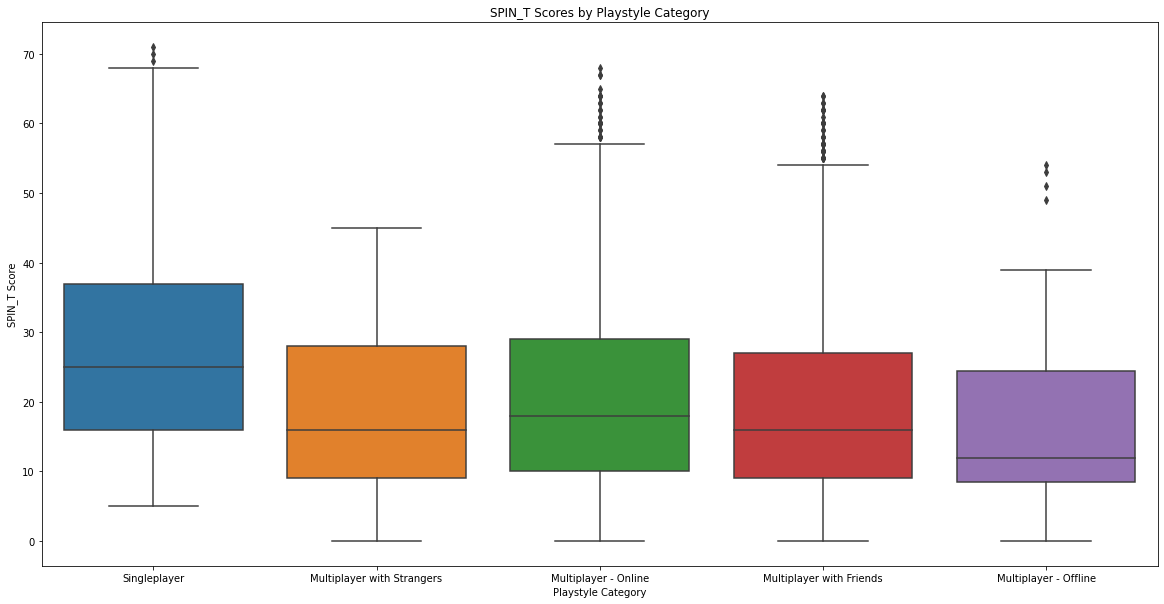

In [104]:
# Grouped Box Plots for GAD_T
plt.figure(figsize = (20,10))
sns.boxplot(x="Playstyle_category", y="SPIN_T", data=df)
plt.xlabel("Playstyle Category")
plt.ylabel("SPIN_T Score")
plt.title("SPIN_T Scores by Playstyle Category")
plt.show()

In [105]:
import pandas as pd
import numpy as np
from scipy import stats

# Create a new DataFrame without rows where "SPIN_T" is not NULL
new_df = df.dropna(subset=['SPIN_T'])

# Assuming you have the 'new_df' from the previous steps

# 1. Create Empty Arrays for Each Category
singleplayer_spin_t = np.array([])
multiplayer_strangers_spin_t = np.array([])
multiplayer_unknown_spin_t = np.array([])
multiplayer_offline_spin_t = np.array([])
multiplayer_online_spin_t = np.array([])
multiplayer_with_friends_spin_t = np.array([])

# 2. Loop through DataFrame and Populate Arrays
for index, row in new_df.iterrows():
    category = row["Playstyle_category"]
    spin_t_value = row["SPIN_T"]
    
    if category == "Singleplayer":
        singleplayer_spin_t = np.append(singleplayer_spin_t, spin_t_value)
    elif category == "Multiplayer with Strangers":
        multiplayer_strangers_spin_t = np.append(multiplayer_strangers_spin_t, spin_t_value)

    elif category == "Multiplayer - Offline":
        multiplayer_offline_spin_t = np.append(multiplayer_offline_spin_t, spin_t_value)
    elif category == "Multiplayer - Online":
        multiplayer_online_spin_t = np.append(multiplayer_online_spin_t, spin_t_value)
    elif category == "Multiplayer with Friends":
        multiplayer_with_friends_spin_t = np.append(multiplayer_with_friends_spin_t, spin_t_value)

# # 3. Perform ANOVA (using SciPy)
# f_statistic, p_value = stats.f_oneway(singleplayer_spin_t, 
#                                      multiplayer_strangers_spin_t, 
#                                      multiplayer_unknown_spin_t,
#                                      multiplayer_offline_spin_t,
#                                      multiplayer_online_spin_t,
#                                      multiplayer_with_friends_spin_t)

# print("F-statistic:", f_statistic)
# print("p-value:", p_value)

In [106]:
new_df.shape

(11947, 24)

In [107]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from scipy.stats import shapiro, kstest

# # Assuming you have the 'new_df' from the previous step

# # Loop through each Playstyle_category
# for category in new_df["Playstyle_category"].unique():
#     subset_data = new_df[new_df["Playstyle_category"] == category]["SPIN_T"]
#     subset_data = pd.to_numeric(subset_data, errors='coerce')

#     # Check if there are enough data points for testing
#     if len(subset_data) < 3:
#         print(f"Insufficient data points for normality test in category: {category}")
#         continue  # Skip to the next category

#     # Histogram
#     plt.hist(subset_data, bins=10, alpha=0.7, label=category)
#     plt.xlabel("SPIN_T Score")
#     plt.ylabel("Frequency")
#     plt.legend()
#     plt.title(f"Distribution of SPIN_T Scores for {category}")
#     plt.show()

#     # Q-Q Plot
#     sm.qqplot(subset_data, line='s')
#     plt.title(f"Q-Q Plot for SPIN_T Scores in {category}")
#     plt.show()

#     # Shapiro-Wilk Test
#     stat, p_value = shapiro(subset_data)
#     print(f"Shapiro-Wilk Test for {category}: statistic={stat:.3f}, p-value={p_value:.4f}")

#     # Kolmogorov-Smirnov Test (comparing to normal distribution)
#     stat, p_value = kstest(subset_data, 'norm')
#     print(f"Kolmogorov-Smirnov Test for {category}: statistic={stat:.3f}, p-value={p_value:.4f}")
#     print("---")

## Not Normal

In [108]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming you have the 'new_df' from the previous steps

# 1. Create Empty Arrays for Each Category

singleplayer_spin_t = np.array([])
multiplayer_strangers_spin_t = np.array([])
multiplayer_unknown_spin_t = np.array([])
multiplayer_offline_spin_t = np.array([])
multiplayer_online_spin_t = np.array([])
multiplayer_with_friends_spin_t = np.array([])

# 2. Loop through DataFrame and Populate Arrays

for index, row in new_df.iterrows():
    category = row["Playstyle_category"]
    spin_t_value = row["SPIN_T"]
    
    if category == "Singleplayer":
        singleplayer_spin_t = np.append(singleplayer_spin_t, spin_t_value)
    elif category == "Multiplayer with Strangers":
        multiplayer_strangers_spin_t = np.append(multiplayer_strangers_spin_t, spin_t_value)
    elif category == "Multiplayer-Unknown":
        multiplayer_unknown_spin_t = np.append(multiplayer_unknown_spin_t, spin_t_value)
    elif category == "Multiplayer - Offline":
        multiplayer_offline_spin_t = np.append(multiplayer_offline_spin_t, spin_t_value)
    elif category == "Multiplayer - Online":
        multiplayer_online_spin_t = np.append(multiplayer_online_spin_t, spin_t_value)
    elif category == "Multiplayer with Friends":
        multiplayer_with_friends_spin_t = np.append(multiplayer_with_friends_spin_t, spin_t_value)

import pandas as pd
import numpy as np
from scipy import stats

# Assuming you have the 'new_df' and arrays created as before

# 1. Perform Kruskal-Wallis H Test
h_statistic, p_value = stats.kruskal(singleplayer_spin_t, 
                                      multiplayer_strangers_spin_t, 
                                      multiplayer_unknown_spin_t,
                                      multiplayer_offline_spin_t,
                                      multiplayer_online_spin_t,
                                      multiplayer_with_friends_spin_t)

print("H-statistic:", h_statistic)
print("p-value:", p_value)

H-statistic: nan
p-value: nan


In [109]:
import pandas as pd

# Create a DataFrame with the category labels and corresponding SPIN_T values
data = {
    'Category': ['Singleplayer'] * len(singleplayer_spin_t) + \
                ['Multiplayer with Strangers'] * len(multiplayer_strangers_spin_t) + \
                # ['Multiplayer-Unknown'] * len(multiplayer_unknown_spin_t) + \
                ['Multiplayer - Offline'] * len(multiplayer_offline_spin_t) + \
                ['Multiplayer - Online'] * len(multiplayer_online_spin_t) + \
                ['Multiplayer with Friends'] * len(multiplayer_with_friends_spin_t),
        'SPIN_T': np.concatenate([
        singleplayer_spin_t, 
        multiplayer_strangers_spin_t, 
        # multiplayer_unknown_spin_t, 
        multiplayer_offline_spin_t, 
        multiplayer_online_spin_t, 
        multiplayer_with_friends_spin_t
    ])
}

# Create DataFrame
df_spin_t = pd.DataFrame(data)

# Display the DataFrame
df_spin_t.head()

,Category,SPIN_T
0,Singleplayer,10.0
1,Singleplayer,11.0
2,Singleplayer,35.0
3,Singleplayer,41.0
4,Singleplayer,31.0


In [110]:
import pingouin as pg

# Perform Games-Howell post hoc test
posthoc = pg.pairwise_gameshowell(data=df_spin_t, dv='SPIN_T', between='Category')
posthoc

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Multiplayer - Offline,Multiplayer - Online,17.883721,20.539984,-2.656263,2.206780,-1.203683,43.355315,0.749236,-0.194450
1,Multiplayer - Offline,Multiplayer with Friends,17.883721,18.811868,-0.928147,2.196366,-0.422583,42.542899,0.993089,-0.073572
2,Multiplayer - Offline,Multiplayer with Strangers,17.883721,18.974352,-1.090631,2.199699,-0.495809,42.801714,0.987338,-0.084297
3,Multiplayer - Offline,Singleplayer,17.883721,27.008915,-9.125194,2.254548,-4.047460,47.222324,0.001713,-0.651589
4,Multiplayer - Online,Multiplayer with Friends,20.539984,18.811868,1.728116,0.328044,5.267945,4430.918465,0.000001,0.133506
5,Multiplayer - Online,Multiplayer with Strangers,20.539984,18.974352,1.565632,0.349665,4.477515,4993.209093,0.000076,0.118487
6,Multiplayer - Online,Singleplayer,20.539984,27.008915,-6.468932,0.605456,-10.684391,1054.426283,0.000000,-0.471572
7,Multiplayer with Friends,Multiplayer with Strangers,18.811868,18.974352,-0.162484,0.276429,-0.587798,7770.733510,0.976930,-0.012760
8,Multiplayer with Friends,Singleplayer,18.811868,27.008915,-8.197048,0.566325,-14.474095,821.597133,0.000000,-0.642107
9,Multiplayer with Strangers,Singleplayer,18.974352,27.008915,-8.034563,0.579118,-13.873793,895.665537,0.000000,-0.613869


In [111]:
# Filter pairs with high significance (p < 0.05)
high_significance_pairs = posthoc[posthoc['pval'] < 0.05]
high_significance_pairs

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
3,Multiplayer - Offline,Singleplayer,17.883721,27.008915,-9.125194,2.254548,-4.047460,47.222324,0.001713,-0.651589
4,Multiplayer - Online,Multiplayer with Friends,20.539984,18.811868,1.728116,0.328044,5.267945,4430.918465,0.000001,0.133506
5,Multiplayer - Online,Multiplayer with Strangers,20.539984,18.974352,1.565632,0.349665,4.477515,4993.209093,0.000076,0.118487
6,Multiplayer - Online,Singleplayer,20.539984,27.008915,-6.468932,0.605456,-10.684391,1054.426283,0.000000,-0.471572
8,Multiplayer with Friends,Singleplayer,18.811868,27.008915,-8.197048,0.566325,-14.474095,821.597133,0.000000,-0.642107
9,Multiplayer with Strangers,Singleplayer,18.974352,27.008915,-8.034563,0.579118,-13.873793,895.665537,0.000000,-0.613869


In [112]:
# correlation_coefficient = df["Hours"].corr(df["GAD_T"])

# # Plot scatter plot
# plt.figure(figsize=(10, 10))
# plt.scatter(df["Hours"], df["GAD_T"], alpha=0.5)
# plt.title("Relationship between Hours Played per Week and Anxiety Levels (Hours <= 50)")
# plt.xlabel("Hours Played per Week")
# plt.ylabel("GAD-7 Score")
# plt.grid(True)
# plt.show()

# print("Correlation Coefficient between Hours Played per Week and GAD-T Score (Hours <= 50):", correlation_coefficient)

In [113]:
# plt.figure(figsize=(15, 8))  # Adjust the values as needed

# # Rest of the plotting code remains the same, e.g.,
# sns.histplot(df['Hours'], kde=True)
# plt.xlabel("Hours Played per Week")
# plt.ylabel("Frequency")
# plt.title("Distribution of Gaming Hours")
# plt.grid(True)
# plt.show()

In [114]:
# correlation = df['Hours'].corr(df['GAD_T'])
# print("Correlation between Hours and GAD_T:", correlation)

In [115]:
# plt.figure(figsize=(20, 8))
# sns.regplot(x='Hours', y='GAD_T', data=df)
# plt.xlabel("Hours Played per Week")
# plt.ylabel("GAD Score")
# plt.title("Scatter Plot with regression for Gaming Hours vs. Anxiety")
# plt.show()

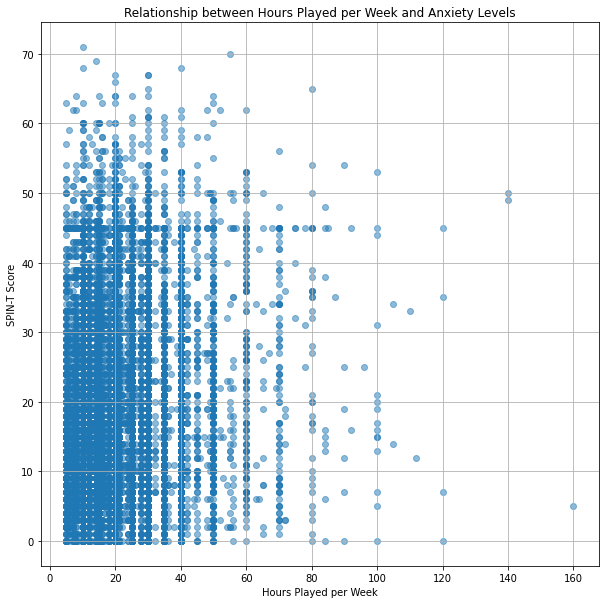

Correlation Coefficient between Hours Played per Week and SPIN-T Score: 0.10269607085370432


In [116]:
# Filter out rows with missing values in SPIN_T column
df = df.dropna(subset=["SPIN_T"])

# Calculate correlation coefficient between hours played per week and GAD-7 scores
correlation_coefficient = df["Hours"].corr(df["SPIN_T"])

# Plot scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(df["Hours"], df["SPIN_T"], alpha=0.5)
plt.title("Relationship between Hours Played per Week and Anxiety Levels")
plt.xlabel("Hours Played per Week")
plt.ylabel("SPIN-T Score")
plt.grid(True)
plt.show()

print("Correlation Coefficient between Hours Played per Week and SPIN-T Score:", correlation_coefficient)

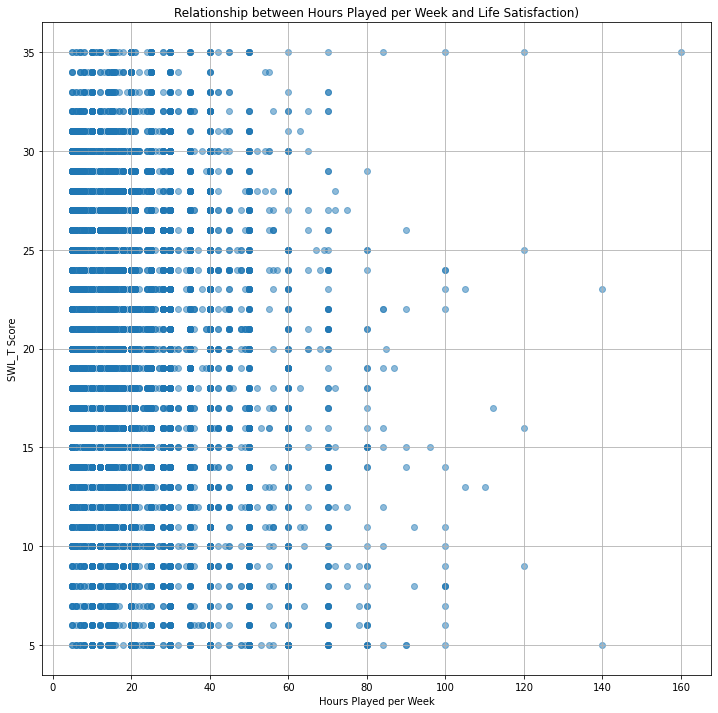

Correlation Coefficient between Hours Played per Week and SWL_T Score (Hours <= 50): -0.13891834173989628


In [117]:
df = df.dropna(subset=["SWL_T"])

# Calculate correlation coefficient between hours played per week and GAD-7 scores
correlation_coefficient = df["Hours"].corr(df["SWL_T"])

# Plot scatter plot
plt.figure(figsize=(12, 12))
plt.scatter(df["Hours"], df["SWL_T"], alpha=0.5)
plt.title("Relationship between Hours Played per Week and Life Satisfaction)")
plt.xlabel("Hours Played per Week")
plt.ylabel("SWL_T Score")
plt.grid(True)
plt.show()

print("Correlation Coefficient between Hours Played per Week and SWL_T Score (Hours <= 50):", correlation_coefficient)

In [118]:
# plt.scatter(df["Age"], df["Hours"],     alpha=0.5)
# plt.ylim(0, 175)
# plt.xlabel("Age")
# plt.ylabel("Hours Played")
# plt.title("Age vs Hours Played")
# plt.show()

In [119]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming you have your DataFrame 'df' with columns: 'age', 'hours_played', 'platform'

# # 1. Define age groups (customize as needed)
# age_bins = [18, 29, 39, 45, 60, 100]
# age_labels = ['18-28', '29-38', '39-44', '45-59', '60+']

# # 2. Create age category column
# df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
# # make an appropriate graph for work and gaming hours other than scatter plot, boxplot, violin plot
# plt.figure(figsize=(10, 8))
# sns.barplot(data=df, x="age_group", y="Hours", hue="Platform")
# plt.grid(True)
# plt.title("Average Hours of Gaming by Age group")

In [120]:
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [121]:
# Assuming your DataFrame is called 'df'
# correlation_matrix = df.corr()
import networkx as nx

# Optional: Select specific columns for the network graph
columns_to_include = ['SPIN_T', 'GAD_T', 'SWL_T', 'Hours', 'Narcissism']
correlation_matrix = df[columns_to_include].corr()

# Create a graph object
G = nx.Graph()

# Add nodes (variables) to the graph
for col in correlation_matrix.columns:
    G.add_node(col)

# Add edges (correlations) between nodes
for i, row in correlation_matrix.iterrows():
    for j, correlation in row.items():  # Use .items() instead of .iteritems()
        if i != j:  # Avoid self-loops
            G.add_edge(i, j, weight=abs(correlation))  # Use absolute value for edge weight
            
# Node sizes based on degree (number of connections)
node_sizes = [G.degree(node) * 50 for node in G.nodes]

# Edge colors based on correlation strength
edge_colors = [G[u][v]['weight'] for u, v in G.edges()]

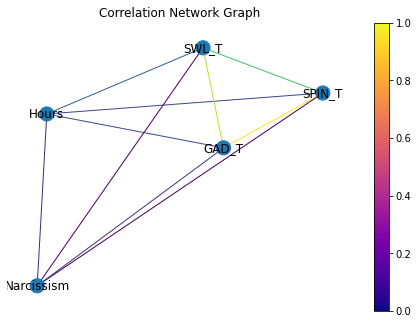

In [122]:
# Set layout (experiment with different layouts)
pos = nx.spring_layout(G, k=0.8)  # k controls node distance

# Draw nodes, edges, and labels
nx.draw(G, pos, with_labels=True, node_size=node_sizes, edge_color=edge_colors, 
        cmap=plt.cm.plasma)  # cmap for colormap

# Add a colorbar (optional)
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
plt.colorbar(sm)

plt.title("Correlation Network Graph")
plt.show()

/tmp/ipykernel_12926/2011153314.py:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipykernel_12926/2011153314.py:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipykernel_12926/2011153314.py:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipykernel_12926/2011153314.py:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipykernel_12926/2011153314.py:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




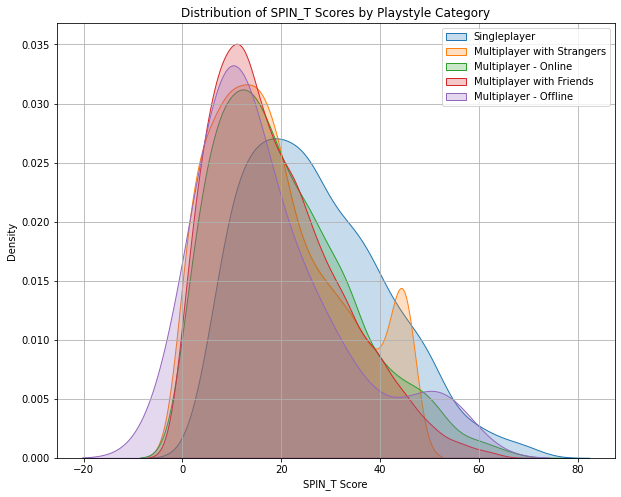

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'new_df' with 'Playstyle_category' and 'SPIN_T_values' columns
plt.figure(figsize=(10,8))

# Create a density plot for each Playstyle category
for category in new_df["Playstyle_category"].unique():
    subset_data = new_df[new_df["Playstyle_category"] == category]["SPIN_T"]
    sns.kdeplot(data=subset_data, label=category, shade=True)


plt.xlabel("SPIN_T Score")
plt.ylabel("Density")
plt.title("Distribution of SPIN_T Scores by Playstyle Category")
plt.grid(True)
plt.legend()
plt.show()

In [124]:
import plotly.express as px

# Example: Interactive scatter plot with Plotly
fig = px.scatter(df, x="Hours", y="SPIN_T", color="Playstyle_category", 
                 hover_data=['GAD_T', 'SWL_T'], 
                 title="Interactive Scatter Plot with Hover Data")
fig.show()

/tmp/ipykernel_12926/579166.py:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




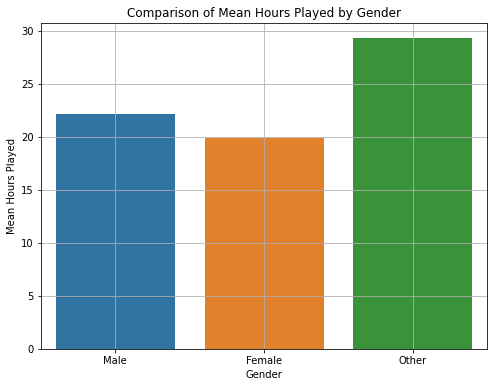

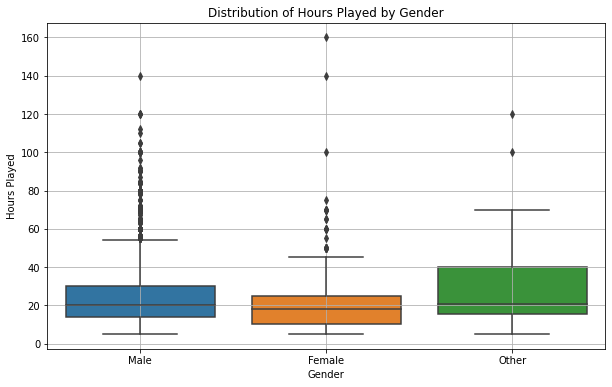

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with columns 'Hours' and 'Gender'

# Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Gender', y='Hours', ci=None)  # ci=None to suppress error bars
plt.xlabel('Gender')
plt.ylabel('Mean Hours Played')
plt.title('Comparison of Mean Hours Played by Gender')
plt.grid(True)
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Hours')
plt.xlabel('Gender')
plt.ylabel('Hours Played')
plt.title('Distribution of Hours Played by Gender')
plt.grid(True)
plt.show()
